# Data exploration and visualization guidelines
Some (opinionated) notes on exploratory data visualization.

First, we need some data to visualize. Let's use the classic iris dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add on the target column
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## Histograms
Histograms are a great way to visualize the distribution of a single variable. A lot of sample code (in the textbook, and in the wild) uses 50 bins as a reasonable compromise between detail and readability. However, the number of bins should be adjusted based on:
- The number of samples
- The range and discretization of the feature

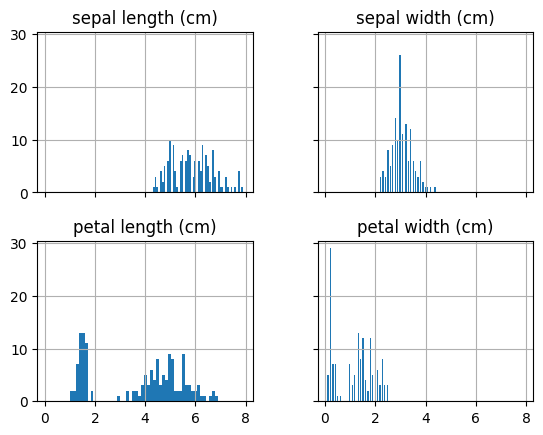

In [3]:
# TODO: Adjust the number of bins to make these histograms look good
df.hist(bins=50, sharey=True, sharex=True)
plt.show()

Alternatively, you could overlay multiple histograms on a single plot.

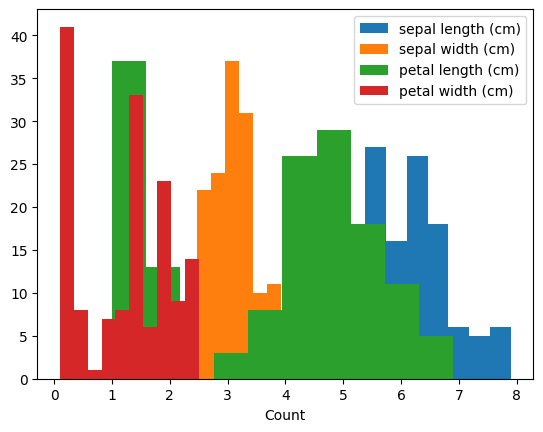

In [4]:
predictors = df.columns[:-1]
for pred in predictors:
    # TODO: Adjust the number of bins and the transparency of each
    # histogram with the "alpha" parameter to make it look good
    plt.hist(df[pred], label=pred)

plt.legend()
plt.xlabel("Value")
plt.xlabel("Count")
plt.show()

## Scatter plots
Great for showing relationships between two variables, or trends over time. However, overlapping data points, such as when looking at numerical vs categorical data, can make it tough to see the difference between a single point and a dense cluster of points.

Text(0, 0.5, 'Sepal Length (cm)')

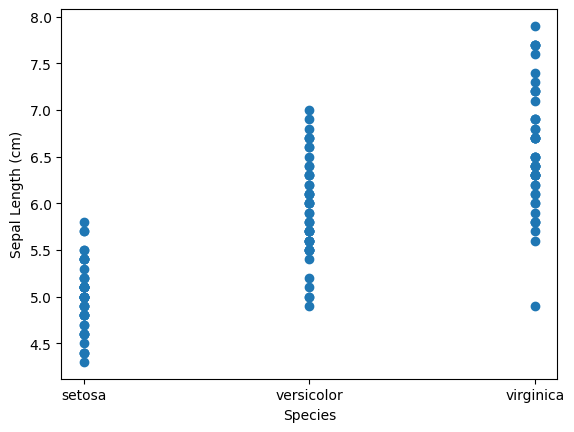

In [5]:
plt.scatter(df["species"], df["sepal length (cm)"])
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
# It's a good idea to label your axes!

Text(0, 0.5, 'Sepal Length (cm)')

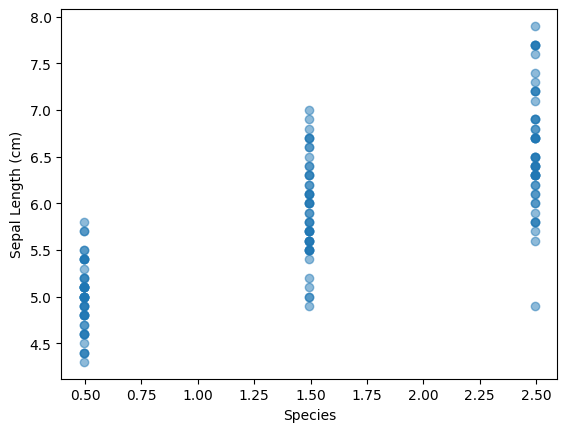

In [8]:
# Option 1: add jitter
# TODO: create a new x-variable with a small amount of random jitter
# (hint: np.random.randn will create normally distributed random variables)
x = df["species"].cat.codes + np.random.randn()
plt.scatter(x, df["sepal length (cm)"], alpha=0.5)
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")

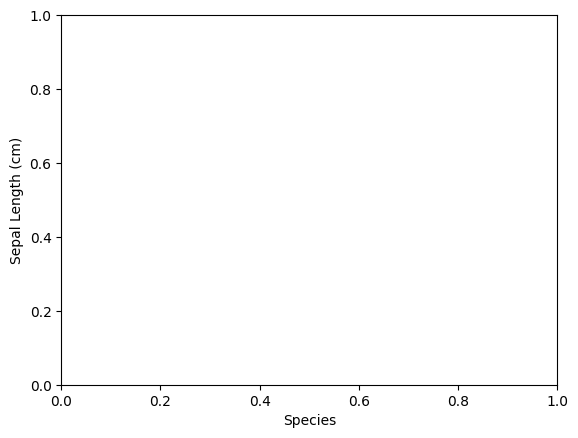

In [9]:
# Option 2: boxplot
# TODO: Refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.grid(False)

## Bar graphs
In general, bar graphs should follow a few rules:
- The x-axis should be categorical
- The y-axis should start at 0
- The bars should be ordered in a meaningful way (ideally)
- Comparable plots should be organized the same way

Text(0.5, 1.0, 'Tax rates will skyrocket under NDP leadership')

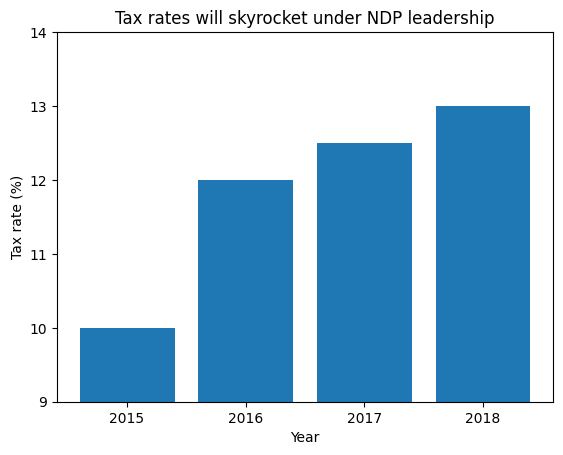

In [10]:
# example of misleading plot
plt.bar(range(4), [10, 12, 12.5, 13], tick_label=[2015, 2016, 2017, 2018])
plt.ylabel("Tax rate (%)")
plt.xlabel("Year")
# TODO: Fix the limits to follow the general "rules" of bar graphs
plt.ylim(9, 14)
plt.title("Tax rates will skyrocket under NDP leadership")

Text(0.5, 0.04, 'Species')

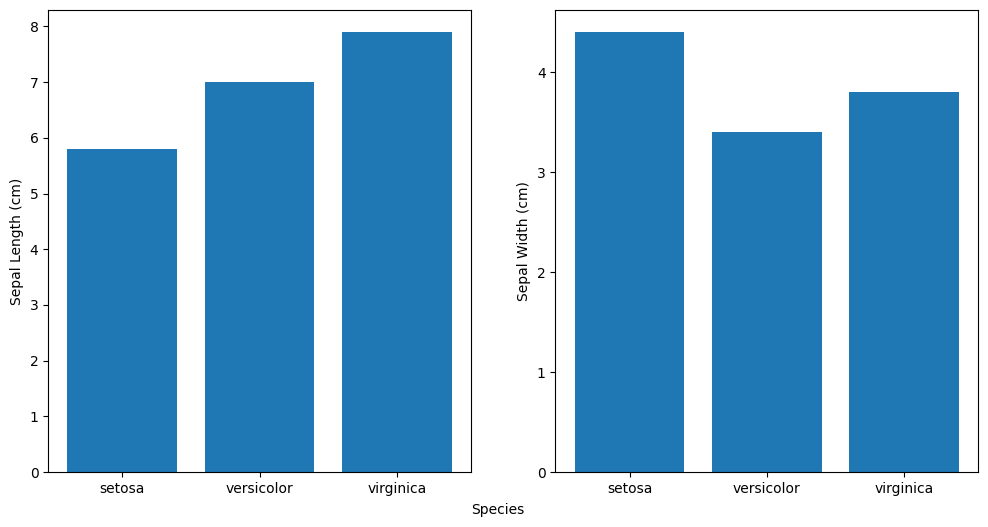

In [11]:
# Category vs sepal length and width
# TODO: Add the sharex/sharey flags to make these plots more comparable
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(df["species"], df["sepal length (cm)"], label="Sepal Length")
ax[1].bar(df["species"], df["sepal width (cm)"], label="Sepal Width")
ax[0].set_ylabel("Sepal Length (cm)")
ax[1].set_ylabel("Sepal Width (cm)")

# one big xlabel
fig.text(0.5, 0.04, "Species", ha="center")

## Fancy plots with Seaborn
[Seaborn](https://seaborn.pydata.org/index.html) is a high level wrapper around matplotlib that provides a quick way of drawing some fancier stats plots.

Here I'm showing how to draw a scatter plot with histograms along the margins. Try checking out the [Example gallery](https://seaborn.pydata.org/examples/index.html) for more ideas.


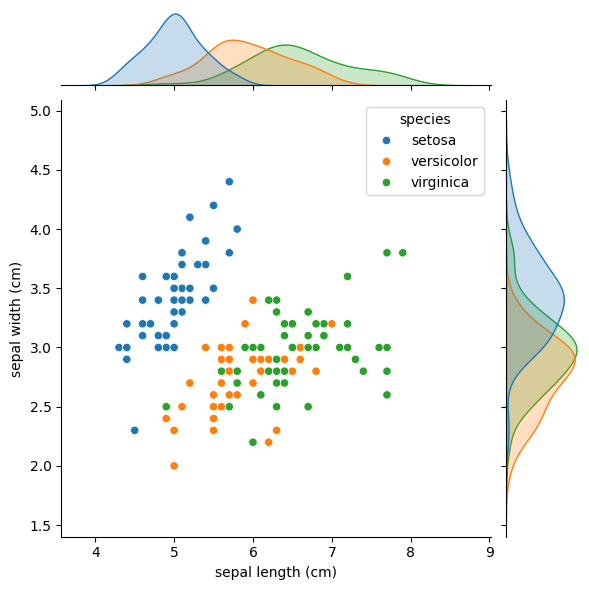

In [15]:
# Example: jointplot
import seaborn as sns

sns.jointplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df, kind="scatter", hue="species"
)

## Things to consider
- How do you decide which type of plot to use?
- Information density vs readability?
- What about colour schemes? Consider how things might look in greyscale, or for people with colour vision deficiencies.
- Pay attention to figures in the media, social media, papers, etc. Maybe even check out the [Data is Beautiful](https://www.reddit.com/r/dataisbeautiful/) subreddit (although there is a tendency to over-use animations in my opinion).

For further reading, one classic book is Edward Tufte's [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), or this quick summary of his [6 principles](https://www.linkedin.com/pulse/edward-tuftes-six-principles-graphical-integrity-radhika-raghu/). I particularly like the concept of "data-ink ratio" and "chartjunk", though I think this has thankfully gotten better over the past 20-odd years.